In [120]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import io
import nltk 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics

import pandas as pd
from lexrank import LexRank
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
def convert_folder(path):
    fnames=[]
    for root, dirs, files in os.walk(path):
        for file in files:
            fnames.append(os.path.join(root,file))
    #print(fnames)
    corpus=''
    for fname in tqdm(fnames):
        corpus+=convert_pdf(fname)+' '
    return corpus

def convert_pdf(path):
    #print(path)
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=False):
        interpreter.process_page(page)



    fp.close()
    device.close()
    text = retstr.getvalue()
    retstr.close()
    return text

In [141]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [4]:
path='C:\\Users\\Chinmayan\\Desktop\\Work\\Siemens\\Work\\Code\\Downloads\\ML_200_corpus\\ML_10_corpus'
corpus=convert_folder(path)


100%|██████████| 10/10 [00:46<00:00,  4.62s/it]


In [5]:
corp_sent=nltk.sent_tokenize(corpus)

In [6]:
sentence_embeddings = model.encode(corp_sent)

In [7]:
sentence_embeddings

array([[-0.95604193,  0.01231971,  0.93189025, ..., -0.33508125,
         0.22182694,  0.16351265],
       [-1.4097081 , -0.10716304,  0.5714542 , ..., -0.67828447,
         0.6827034 , -0.06468484],
       [-0.29688007,  0.2780872 ,  1.1833467 , ..., -0.4801674 ,
         0.40841123, -0.62188154],
       ...,
       [-1.3762175 , -0.5349781 ,  0.5760123 , ...,  0.26964062,
         0.29418465, -1.0866909 ],
       [-1.4325988 , -0.40392485,  0.7591575 , ..., -0.13151333,
        -0.08119088, -0.2680192 ],
       [-0.96655154,  0.29829696, -0.06178864, ..., -0.6862218 ,
         0.1292546 ,  0.4177815 ]], dtype=float32)

In [13]:
from sklearn import metrics
labels = k_means.labels_
metrics.silhouette_score(sentence_embeddings, labels, metric = 'euclidean')

0.059453204

In [16]:
metrics.calinski_harabasz_score(sentence_embeddings, labels)

117.1598339060602

In [75]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    k_means = KMeans(n_clusters=k)
    cluster_model = k_means.fit(sentence_embeddings)
    sum_of_squared_distances.append(k_means.inertia_) #inerta = sum of squared distance for each point to it's closest centroid (assgined cluster)

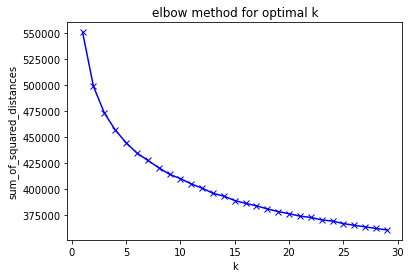

In [76]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

9 appears to be the optimal k value 
(in truth, k mens clustering on raw embeddings will not produce data is sufficiently divisible, this will be replaced by aspect based clustering)

In [87]:
N=9
k_means = KMeans(n_clusters=N)
cluster_model = k_means.fit(sentence_embeddings)
clusters = k_means.predict(sentence_embeddings)
labels = k_means.labels_

In [72]:
metrics.silhouette_score(sentence_embeddings, labels, metric = 'euclidean')

0.062424347

In [73]:
metrics.calinski_harabasz_score(sentence_embeddings, labels)

140.0590041500181

In [74]:
k_means.cluster_centers_

array([[-0.51436734, -0.1701127 ,  0.44110763, ..., -0.30240938,
         0.08810309, -0.479613  ],
       [-0.54308903, -0.89280456,  0.8588432 , ..., -0.14319208,
         0.15059066, -0.43422884],
       [-0.6844016 , -0.45973253,  0.7535728 , ..., -0.14860462,
        -0.06818486, -0.31142607],
       ...,
       [-0.5591063 , -0.28548104,  0.6254571 , ..., -0.2090591 ,
        -0.06662368, -0.3591279 ],
       [-0.7874719 , -0.34452575,  0.5993515 , ..., -0.30438524,
         0.1811681 , -0.36463147],
       [-0.79967   , -0.41392705,  0.66368216, ..., -0.20022777,
        -0.00537953, -0.32597417]], dtype=float32)

In [143]:
clusters

array([2, 1, 2, ..., 3, 2, 3])

In [89]:
cluster_df=pd.DataFrame(sentence_embeddings)


In [92]:
cluster_df['cluster']=clusters

In [145]:
cluster_df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,cluster
0,-0.956042,0.012320,0.931890,-1.373932,-0.148879,-0.819539,0.658350,-0.085680,1.556409,-1.131261,...,-0.088120,-0.384676,0.652285,-0.464787,0.330640,-0.152571,-0.335081,0.221827,0.163513,2
1,-1.409708,-0.107163,0.571454,-0.293092,-0.220212,-1.066455,1.310054,-0.273459,0.673982,-0.857066,...,0.079770,0.879043,0.514043,-0.118699,-0.020508,0.443668,-0.678284,0.682703,-0.064685,1
2,-0.296880,0.278087,1.183347,-0.658100,0.008596,-0.214842,0.993760,-0.072168,1.115532,-1.249842,...,0.136363,-0.276342,1.092410,-0.525981,0.215958,-0.055326,-0.480167,0.408411,-0.621882,2
3,-1.108715,-0.034434,1.100504,-0.256313,-0.439453,-0.455878,0.473183,-0.410095,0.929165,-1.089171,...,0.589177,0.195223,0.253920,-0.759189,0.733035,0.270951,-0.509543,0.503534,-0.472921,2
4,-0.930788,-0.508998,1.388012,-0.820338,-0.196601,-0.792933,1.197120,-0.547936,0.429919,-0.562648,...,0.481826,0.378141,1.135984,0.670425,-0.120453,-0.386618,-0.389926,0.528415,-0.635000,8


In [122]:
cluster_centroids=cluster_df.groupby('cluster').mean().values

In [123]:
by_cluster=cluster_df.groupby('cluster')

In [155]:
salient_embeddings=[]
salient_sentences=[]
for i in range(N):
    cluster_vectors=by_cluster.get_group(i).drop('cluster', 1).values
    cluster_ids=by_cluster.get_group(i).index
    similarities=cosine_similarity(cluster_vectors, [cluster_centroids[i]]) 
    salient_embeddings.append(cluster_vectors[np.argmax(similarities)])
    salient_sentences.append(corp_sent[cluster_ids[np.argmax(similarities)]])

In [156]:
salient_sentences

['However,\nwhen the only visual image sequences are given, the feature\nvectors are not so clearly separated that the repeated recall-\ning in multimodal autoencoder would not improve.',
 'Our model consists of encoder and\ndecoder LSTMs and multimodal autoencoder.',
 "4 Discussion\n\nHere we have introduced spline transformations, a module for neural\nnetworks, and demonstrated that it is an effective way to model relative\n\n...ACTCTCACTGTGACCTTCTCTTTCCCAGCAT...AG...AGNucleotide compositionNucleotide compositionDistance to 5' exonDistance to 3' exonDistance to PPTPPT lengthDistances to AG dinucleotides*a0.900.920.94Area under ROC curve0.500.550.600.65Area under Precision−Recall curveowcbed  Model PWM (Inferred)Branchpoint−centered PWM (Data)123456789101112345678910110.00.40.81.2Bits3' exon distanceModel version:   deep   shallowBinary softmax lossSpline transformation.. 0 0 0 0 0 0 0 0 1 0 0 0 1 NA 0 .. DropoutConcatenateConv1DConv1DDropoutx#hidden: 2, 0RNA sequenceConv1DACGT#(cid:1

In [159]:
for i in range(N):
    print(salient_sentences[i])
    print('------')
    print(corp_sent[by_cluster.get_group(i).index[0]])
    print('==========')

However,
when the only visual image sequences are given, the feature
vectors are not so clearly separated that the repeated recall-
ing in multimodal autoencoder would not improve.
------
The Digitalized K Domain is well known but on the contrary, the K’ Domain as depicted in this document is 
almost undefined today;  as we only have people interacting against K, and now suggest a set of conjectures under 
which (K + K’) would work.
Our model consists of encoder and
decoder LSTMs and multimodal autoencoder.
------
If the discipline that actually handles Knowledge is KM, Knowledge 
Management, our aim is to create the basement of an enhanced management system that handles (K + K’) instead, 
where K corresponds to the actual formal established knowledge and K’ corresponds to the actual “informal” 
People’s knowledge.
4 Discussion

Here we have introduced spline transformations, a module for neural
networks, and demonstrated that it is an effective way to model relative

...ACTCTCACTGTGAC